In [1]:
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from babel.numbers import format_currency
sns.set(style="dark")

In [2]:
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule="D", on="order_date").agg({
        "order_id": "nunique",
        "total_price": "sum",
    })

    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "total_price": "revenue",
    }, inplace=True)

    return daily_orders_df

def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

def create_bygender_df(df):
    bygender_df = df.groupby(by="gender").customer_id.nunique().reset_index()
    bygender_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)

    return bygender_df

def create_byage_df(df):
    byage_df = df.groupby(by="age").customer_id.nunique().reset_index()
    byage_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)

    return byage_df

def create_bystate_df(df):
    bystate_df = df.groupby(by="state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)

    return bystate_df

def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_id", as_index=False).agg({
        "order_date": "max",
        "order_id": "nunique",
        "total_price": "sum"
    })
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_date"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    
    return rfm_df



In [3]:
all_df = pd.read_csv("all_data.csv")

In [4]:
datetime_columns = ["order_date", "delivery_date"]
all_df.sort_values(by="order_date", inplace=True)
all_df.reset_index(inplace=True)

for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])

In [5]:
min_date = all_df["order_date"].min()
max_date = all_df["order_date"].max()

with st.sidebar:
    st.image("foto-sidebar.jpg")

    start_date, end_date = st.date_input(
        label="Rentang waktu", min_value=min_date,
        max_value=max_date,value=[min_date, max_date]
    )

2023-10-28 07:03:48.854 
  command:

    streamlit run C:\Users\Muhamad Raka Pratama\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [6]:
main_df = all_df[(all_df["order_date"] >= str(start_date))&
                (all_df["order_date"] <= str(end_date))]

daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
bygender_df = create_bygender_df(main_df)
byage_df = create_byage_df(main_df)
bystate_df = create_bystate_df(main_df)
rfm_df = create_rfm_df(main_df)

DeltaGenerator()

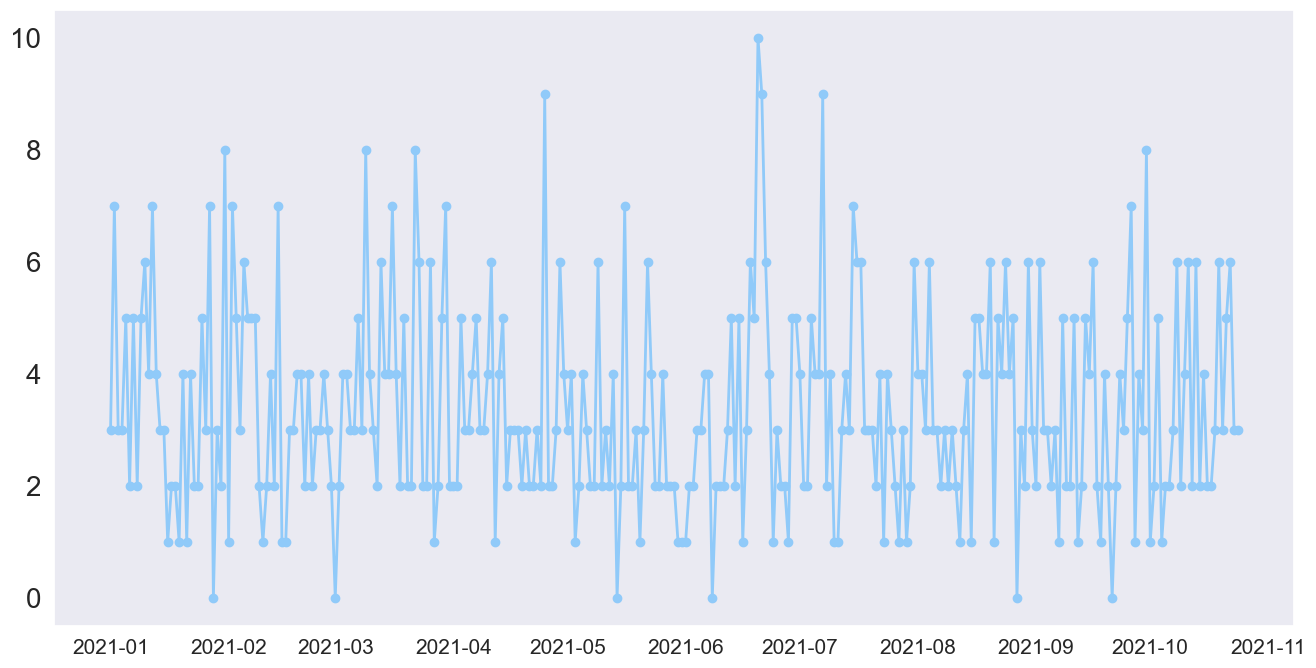

In [7]:
st.header("Collection Dashboard :sparkles:")
st.subheader("Daily Orders")

col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total Orders", value=total_orders)
with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "AUD", locale="es_CO")
    st.metric(label="Total Revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(
    daily_orders_df["order_date"],
    daily_orders_df["order_count"],
    marker="o",
    linewidth=2,
    color="#90CAF9"
)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=20)

st.pyplot(fig)

In [8]:
st.subheader("Best & Worst Performing Product")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)

C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\1667423983.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\1667423983.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


DeltaGenerator()

In [9]:
st.subheader("Customer Demographics")
 
col1, col2 = st.columns(2)
 
with col1:
    fig, ax = plt.subplots(figsize=(20, 10))
 
    sns.barplot(
        y="customer_count", 
        x="gender",
        data=bygender_df.sort_values(by="customer_count", ascending=False),
        palette=colors,
        ax=ax
    )
    ax.set_title("Number of Customer by Gender", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=30)
    st.pyplot(fig)
 
with col2:
    fig, ax = plt.subplots(figsize=(20, 10))
    
    colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
    sns.barplot(
        y="customer_count", 
        x="age",
        data=byage_df.sort_values(by="age", ascending=False),
        palette=colors,
        ax=ax
    )
    ax.set_title("Number of Customer by Age", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=30)
    plt.xticks(rotation='vertical')
    plt.margins(0.3)
    st.pyplot(fig)

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors,
    ax=ax
)
ax.set_title("Number of Customer by States", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
st.pyplot(fig)

C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\949147489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\949147489.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\949147489.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\949147489.py:27: UserWarning: 
The palette list has fewer values (5) than needed (61) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Muhamad Raka Pratama\

DeltaGenerator()

In [10]:
st.subheader("Best Customer Based on RFM Parameters")

col1, col2, col3 = st.columns(3)

with col1:
    avg_recency = round(rfm_df.recency.mean(), 1)
    st.metric(label="Average Recency (days)", value=avg_recency)

with col2:
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric(label="Average Frequency", value=avg_frequency)

with col3:
    avg_monetary = format_currency(rfm_df.monetary.mean(), "AUD", locale="es_CO")
    st.metric(label="Average Monetary", value=avg_monetary)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35,15))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].set_title("By recency (days)", loc="center", fontsize=60)
ax[0].tick_params(axis="y", labelsize=30)
ax[0].tick_params(axis="x", labelsize=30)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].set_title("By Frequency", loc="center", fontsize=60)
ax[1].tick_params(axis="y", labelsize=30)
ax[1].tick_params(axis="x", labelsize=30)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=True).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].set_title("By Monetary", loc="center", fontsize=60)
ax[2].tick_params(axis="y", labelsize=30)
ax[2].tick_params(axis="x", labelsize=30)

st.pyplot(fig)

C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\2893694615.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\2893694615.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=True).head(5), palette=colors, ax=ax[1])
C:\Users\Muhamad Raka Pratama\AppData\Local\Temp\ipykernel_8940\2893694615.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

DeltaGenerator()